# Задание №2

1. Лаба на линейную регрессию. Требуется настроить коэффициенты линейной регрессии двумя способами: спуском и генетикой. Выбор гиперпараметров и конкретных методов настройки оставляю за вами, но будьте готовы ответить на доп вопросы по ним.
2. Сам датасет представляет собой зависимость стоимости жилья от площади и числа комнат.
3. Для оценки качества работы используем среднеквадратичное отклонение.
4. Требуется научить свой код принимать откуда-нибудь (например с консоли) дополнительные входные точки для проверки уже обученной модели.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

import numpy as np
import scipy.stats as sp

import math
from collections import namedtuple
from functools import partial

# Работа с данными
## Считываем данные

In [2]:
data = pd.read_csv("prices.txt")

X = np.column_stack((data.values[:,:2].astype(np.float64), np.repeat(1, data.shape[0])))
Y = data.values[:,2].astype(np.float64)

##  Отрисуем
Отношение столбцов Х к Y

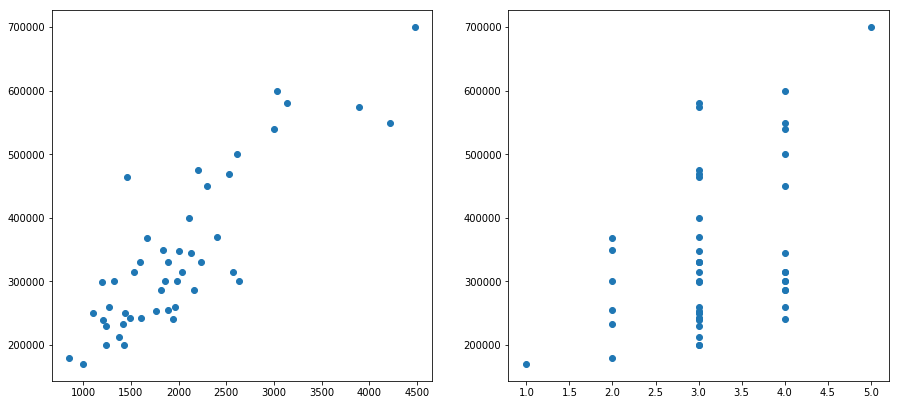

In [3]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(221)
ax.scatter(X[:,0], Y)
ax = fig.add_subplot(222)
ax.scatter(X[:,1], Y)

# Gradient Descent

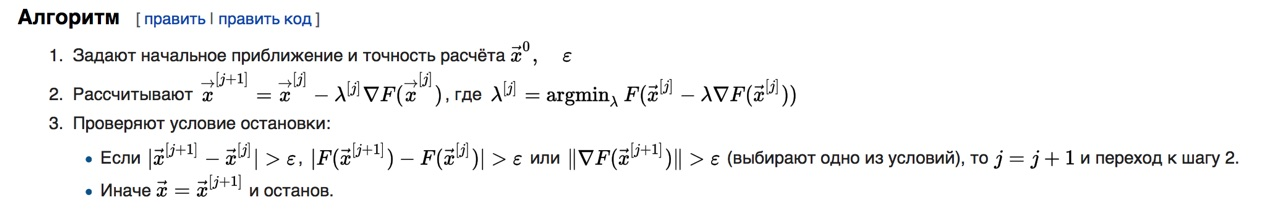

In [4]:
from IPython.display import Image
Image(filename='Gr.jpg')

In [5]:
# отклонение  1/N (theta * X - Y)^2
def deviation(X, Y, theta):
    return np.sqrt(1/X.shape[0] * np.sum(((np.dot(theta, X.T)- Y) ** 2), 1))

# loss_gradient 1/N (theta * X - Y) * X
def loss_gradient(X, Y, theta):
    return 2/X.shape[0] * (theta.dot(X.T) - Y).dot(X)

def gradient_descent(X, Y, theta):
    step_n = 0
    thetas = [theta]
    while True:
        new_theta = theta - 0.2 * loss_gradient(X, Y, theta)
        thetas.append(new_theta)
        step_n += 1
        if (step_n >= 10000):
            return new_theta, np.array(thetas)
        theta = new_theta

Далее отнормируем X, для запуска градиентного спуска

In [6]:
np.random.seed(0)

def normalize_columns(X):
    k = np.max(X, 0)
    return k, X / k

Xk, Xn = normalize_columns(X)

# Установим различные theta
И посчитаем градиентные спуски, и выберем лучшее

In [7]:
TRY_N = 1
Theta0 = (np.random.rand(TRY_N, X.shape[1]) - 0.5) * 2

In [8]:
best_deviation = 1e9
best_theta = []
best_curve = []
for theta in Theta0:
    optimized_theta, optimized_curve = gradient_descent(Xn, Y, theta)
    optimized_deviation = deviation(Xn, Y, [optimized_theta])
    if optimized_deviation < best_deviation:
        best_deviation = optimized_deviation
        best_theta = optimized_theta
        best_curve = optimized_curve
        
best_theta = best_theta / Xk
best_deviation = deviation(X, Y, [best_theta])
best_curve = best_curve / Xk

In [9]:
print(best_theta, best_deviation)

[   139.21067402  -8738.01911233  89597.9095428 ] [ 63926.20824987]


# Genetic Algirothm

Аналогично устоновим theta

In [10]:
NP = 100

np.random.seed(0)
arange = np.arange(NP)

x_theta = (np.random.rand(NP, X.shape[1]) - 0.5) * 2

Исрользуем np.random.permutation:
Randomly permute a sequence, or return a permuted range.

In [11]:
best_thetas = []
best_deviations = []

for step in range(10000):
    x_deviation = deviation(Xn, Y, x_theta)
    x_deviation_argmin = np.argmin(x_deviation)
    best_thetas.append(x_theta[x_deviation_argmin])
    
    r1 = np.random.permutation(NP)
    r2 = np.random.permutation(NP)
    r3 = np.random.permutation(NP)
    
    # создаем новый массив, с learning rate = 0.9
    u_theta = x_theta[r1] + 0.9 * (x_theta[r2] - x_theta[r3])
    u_deviation = deviation(Xn, Y, u_theta)
    
    # скрещиваем (склеиваем массивы)
    xu_theta = np.stack([x_theta, u_theta], axis = 1)
    xu_deviation = np.stack([x_deviation, u_deviation], axis = 1)
    
    # выбираем индексы наилучших элементов в массиве и в x_theta -- подставляем лучшие элементы
    xu_theta_argmin = np.argmin(xu_deviation, axis = 1)
    x_theta = xu_theta[arange, xu_theta_argmin]


In [12]:
x_deviation = deviation(X, Y, x_theta)
x_deviation_argmin = np.argmin(x_deviation)
best_thetas.append(x_theta[x_deviation_argmin])

best_thetas = best_thetas / Xk
best_deviation = deviation(X, Y, [best_thetas[-1]])
print(best_thetas[-1], best_deviation)

[   139.21067373  -8738.01901025  89597.90992223] [ 63926.20824987]


# Learning curve
Отрисуем наилучшие curve градиентного спускаи и генетического алгоритма

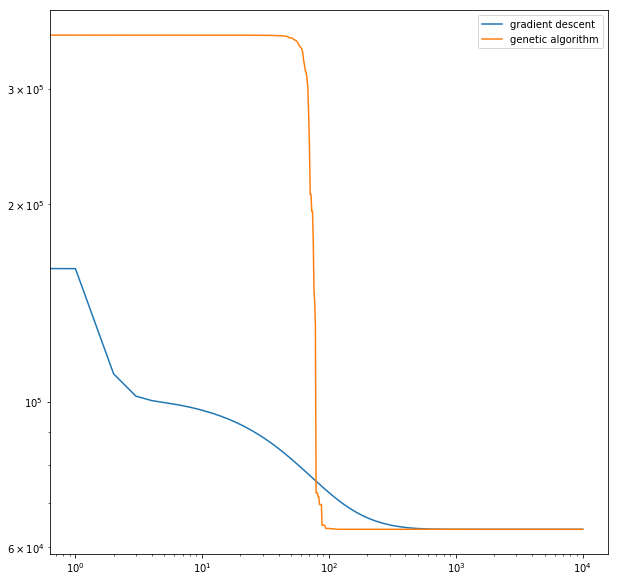

In [13]:
descent_deviations = deviation(X, Y, best_curve)
genetic_deviations = deviation(X, Y, best_thetas)
plt.figure(figsize=(10, 10))
plt.loglog(np.arange(0, descent_deviations.shape[0]), descent_deviations, label="gradient descent")
plt.loglog(np.arange(0, genetic_deviations.shape[0]), genetic_deviations, label="genetic algorithm")
plt.legend()
plt.show()